<a href="https://colab.research.google.com/github/Harshitha1588/AIML-2025/blob/main/LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

Loading the Data

In [3]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [6]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [8]:
print(car_data.DESCR )

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [9]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [10]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [11]:
type(car_data)

pandas.core.frame.DataFrame

3.Exploratory analysis

<Axes: xlabel='binaryClass', ylabel='count'>

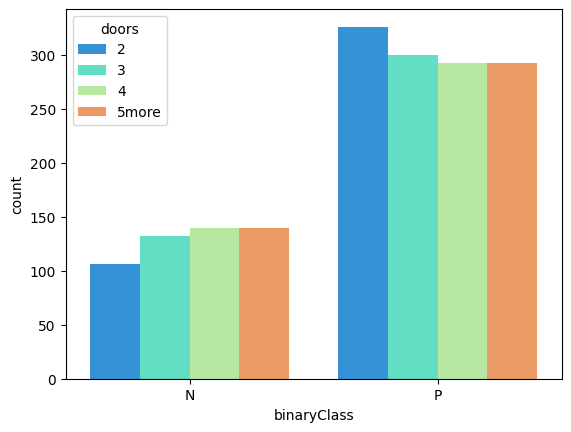

In [12]:
sns.countplot(x=car_data.binaryClass, hue='doors',data=car_data,palette='rainbow')

Splitting data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(car_data, test_size=0.2,random_state=20)
print('training data is: {}\n testing data is: {}'.format(len(train_data),len(test_data)))

training data is: 1382
 testing data is: 346


In [14]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,med,med,2,2,med,low,P
freq,364,351,359,471,467,462,978


In [15]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


checking categorical features

In [16]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [17]:
train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [26]:
train_data['maint'].value_counts()

,count
maint,
med,351
high,349
vhigh,344
low,338


In [25]:
train_data['doors'].value_counts()

,count
doors,
2,359
5more,350
4,347
3,326


In [27]:
train_data['persons'].value_counts()

,count
persons,
2,471
more,460
4,451


<Axes: xlabel='binaryClass', ylabel='count'>

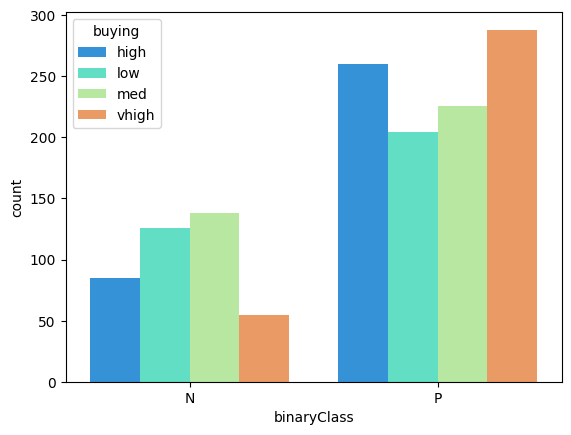

In [28]:
sns.countplot(data=train_data,x='binaryClass',hue='buying',palette='rainbow')


In [18]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared= label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

training decision tree classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [23]:
from sklearn.tree import export_text
text_representation=export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)

|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
preds=tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared,preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[404   0]
 [  0 978]]
